# 4.4 自编码AutoEncoder

- 一种非监督学习的方式，可以看作压缩和解压的过程。  
- 前半部分的编码器使用较多，一般使用编码器+小型神经网络的结构。
<div><img src="./autoencoder.png" width=30%></div>

In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline

EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
N_TEST_IMG = 5

torch.Size([60000, 28, 28])
torch.Size([60000])


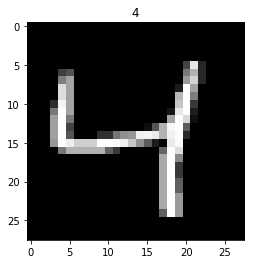

In [5]:
train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=False
)
train_loader = Data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)

print(train_data.data.size())     # (60000, 28, 28)
print(train_data.targets.size())   # (60000)
plt.imshow(train_data.data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[2])
plt.show()

In [12]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64,12),
            nn.Tanh(),
            nn.Linear(12,3),
        )
        self.decoder = nn.Sequential(
            nn.Linear(3,12),
            nn.Tanh(),
            nn.Linear(12,64),
            nn.Tanh(),
            nn.Linear(64,128),
            nn.Tanh(),
            nn.Linear(128,28*28),
            nn.Sigmoid() #将输出压缩至0~1
        )
        
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded,decoded
    
autoencoder = AutoEncoder()
optimizer = torch.optim.Adam(autoencoder.parameters(),lr=LR)
loss_func = nn.MSELoss()



Epoch:  0 | train loss: 0.2326


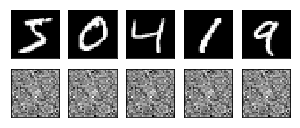

Epoch:  0 | train loss: 0.0586


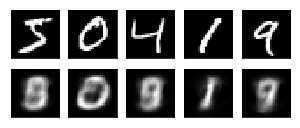

Epoch:  5 | train loss: 0.0379


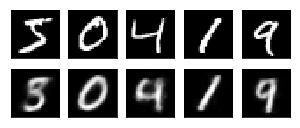

Epoch:  5 | train loss: 0.0412


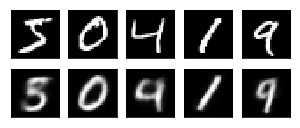

Epoch:  9 | train loss: 0.0385


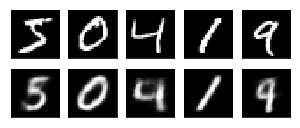

Epoch:  9 | train loss: 0.0352


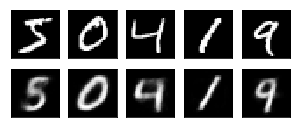

In [13]:
#用来画图的数据
view_data = train_data.data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for epoch in range(EPOCH):
    for step,(xx,yy) in enumerate(train_loader):
        x = xx.view(-1,28*28)
        y = xx.view(-1,28*28)
        y_label = yy
        
        encoded,decoded = autoencoder(x)
        
        loss = loss_func(decoded,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 500 == 0 and epoch in [0, 5, EPOCH-1]:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.item())
                  
             # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            
            # initialize figure
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
    
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show()